# Sentiment Classifiers Binary:
#### This notebook contains various classifiers that can be used on a provided text dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
import keras
import sklearn
import csv
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import operator

C:\Users\Gabri\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
C:\Users\Gabri\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## This function is called by the classifiers to provide a visulization of the results
def plot_confusion_matrix(cm, classes, Y_test,
                          predictions,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print("Confusion Matrix:")
    print(cm)

    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],'d'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    print(classification_report(Y_test, predictions, target_names = classes))

### Complete -> Enter the name of the dataset you want to test into the file_in variable:
##### The file_out dataset is the name of the dataset that will stored the number converted version of the text data. Set the name of file_out to the name of the converted dataset if you already have a dataset that has numeric representations of the dataset already instead of words. Otherwise, file_out will be the output file name that is the converted data of the file_in dataset that gets read in for classification for the tensorflow model. Also, if you already have a converted file, make sure that re_read is set to 0 so that it does not get overwritten.

In [3]:
### Enter filenames below:
file_in = "twitter_sentiment_balanced_final.csv"
file_out = "twitter_sentiment_balanced_final_converted.csv"
### Enter column names for data and labels below:
data_col = "Tweet"
label_col = "Sentiment"
### Set re_read to 0 if you already have a converted text file, 1 if it needs to be created
re_read = 0

In [4]:
df = pd.read_csv(file_in, engine = 'python');
df = df.dropna()
df = df.reset_index()
df = df.drop(columns = ['index'])
print(file_in)
print(df.dtypes)
print("Sample size:", len(df))
print(df.head(5))

twitter_sentiment_balanced_final.csv
Sentiment     int64
Tweet        object
dtype: object
Sample size: 289967
   Sentiment                                              Tweet
0          0  is upset that he can t update his Facebook by ...
1          0  I dived many times for the ball Managed to sav...
2          0     my whole body feels itchy and like its on fire
3          0  no it s not behaving at all i m mad why am i h...
4          0                                 not the whole crew


#### Setting up the data.

In [5]:
X = df[data_col]
Y = df[label_col]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.1, random_state=42, stratify=df[label_col])
print("Train data amount:", len(X_train))
print("Test data amount:", len(X_test))

Train data amount: 260970
Test data amount: 28997


In [31]:
### Stemming
# from nltk.stem import *
# stemmer = PorterStemmer()
# new_xtr2 = []
# new_xte2 = []
# for sent in X_train:
#     sent = nltk.word_tokenize(sent)
#     sent = [stemmer.stem(w) for w in sent]
#     sent = " ".join(sent)
#     new_xtr2.append(sent)
# X_train = new_xtr2
# for sent in X_test:
#     sent = nltk.word_tokenize(sent)
#     sent = [stemmer.stem(w) for w in sent]
#     sent = " ".join(sent)
#     new_xte2.append(sent)
# X_test = new_xte2
# all_data = X_train + X_test

In [ ]:
### Lowercase text
# from nltk.tokenize import RegexpTokenizer
# import string
# tokenizer = RegexpTokenizer(r'\w+')
# table = str.maketrans('', '', string.punctuation)
# new_xtr = []
# new_xte = []
# for sent in X_train:
#     sent = sent.split()
#     sent = [w.translate(table) for w in sent]
#     sent = " ".join(sent)
#     sent = str.lower(sent)
#     new_xtr.append(sent)
# X_train = new_xtr
# for sent in X_test:
#     sent = sent.split()
#     sent = [w.translate(table) for w in sent]
#     sent = " ".join(sent)
#     sent = str.lower(sent)
#     new_xte.append(sent)
# X_test = new_xte
# all_data = X_train + X_test

## Logistic Regression Classifier:

In [47]:
#### Logistic Regression
text_clf_log = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-log', LogisticRegression(solver='liblinear')),
])

In [48]:
text_clf_log = text_clf_log.fit(X_train,Y_train)

In [49]:
predicted_log = text_clf_log.predict(X_test)
accuracy = np.mean(predicted_log == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_log)
print(cm)

Accuracy: 0.7939442011242542
[[11390  3108]
 [ 2867 11632]]


Confusion Matrix:
[[11390  3108]
 [ 2867 11632]]


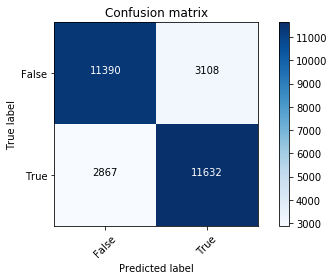

              precision    recall  f1-score   support

       False       0.80      0.79      0.79     14498
        True       0.79      0.80      0.80     14499

   micro avg       0.79      0.79      0.79     28997
   macro avg       0.79      0.79      0.79     28997
weighted avg       0.79      0.79      0.79     28997



In [53]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_log)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_log,
                      title='Confusion matrix')

### Gridsearch: Logistic Regression

In [49]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf-log__C': (10, 1, 1e-1),
              'clf-log__solver': ('liblinear', 'newton-cg', 'lbfgs'),
    }

In [50]:
text_clf_log.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-log', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-log__C', 'clf-log__class_weight', 'clf-log__dual', 'clf-log__fit_intercept', 'clf-log__intercept_scaling', 'clf-log__max_iter', 'clf-log__multi_class', 'clf-log__n_jobs', 'clf-log__penalty', 'clf-log__random_state', 'clf-log__solver', 'clf-log__tol', 'clf-log__verbose', 'clf-log__warm_start'])

In [51]:
## Cross-validation and fit
gs_clf = GridSearchCV(text_clf_log, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train,Y_train)
predicted_gs = gs_clf.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [1]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

In [2]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Random Forest Classifier

In [54]:
#### Random Forest
text_clf_rfc = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-rfc', RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)),
])

In [55]:
text_clf_rfc = text_clf_rfc.fit(X_train,Y_train)

In [56]:
predicted_rfc = text_clf_rfc.predict(X_test)
accuracy = np.mean(predicted_rfc == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_rfc)
print(cm)

Accuracy: 0.713729006448943
[[10218  4280]
 [ 4021 10478]]


Confusion Matrix:
[[10218  4280]
 [ 4021 10478]]


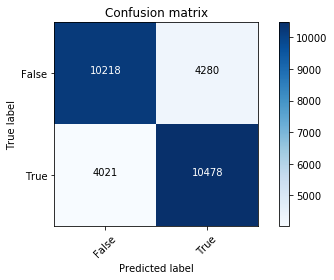

              precision    recall  f1-score   support

       False       0.72      0.70      0.71     14498
        True       0.71      0.72      0.72     14499

   micro avg       0.71      0.71      0.71     28997
   macro avg       0.71      0.71      0.71     28997
weighted avg       0.71      0.71      0.71     28997



In [57]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_rfc)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_rfc,
                      title='Confusion matrix')

### Gridsearch: Random Forest

In [58]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf-rfc__max_depth': (2, 3, 4),
              'clf-rfc__criterion': ("gini", "entropy"),
              'clf-rfc__n_estimators': (100, 200, 300),
    }

In [59]:
text_clf_rfc.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-rfc', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-rfc__bootstrap', 'clf-rfc__class_weight', 'clf-rfc__criterion', 'clf-rfc__max_depth', 'clf-rfc__max_features', 'clf-rfc__max_leaf_nodes', 'clf-rfc__min_impurity_decrease', 'clf-rfc__min_impurity_split', 'clf-rfc__min_samples_leaf', 'clf-rfc__min_samples_split', 'clf-rfc__min_weight_fraction_leaf', 'clf-rfc__n_estimators', 'clf-rfc__n_jobs', 'clf-rfc__oob_score', 'clf-rfc__random_state', 'clf-rfc__verbose', 'clf-rfc__warm_start'])

In [60]:
## Cross-validation and fit
gs_clf = GridSearchCV(text_clf_rfc, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train,Y_train)
predicted_gs = gs_clf.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

In [4]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

In [3]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Multinomial Naive Bayes classifier:

In [58]:
#### Multinomial Naive Bayes
text_clf_mnb = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf-mnb', MultinomialNB()),
])

In [59]:
text_clf_mnb = text_clf_mnb.fit(X_train,Y_train)

In [60]:
predicted_mnb = text_clf_mnb.predict(X_test)
accuracy = np.mean(predicted_mnb == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_mnb)
print(cm)

Accuracy: 0.7636652067455254
[[11361  3137]
 [ 3716 10783]]


Confusion Matrix:
[[11361  3137]
 [ 3716 10783]]


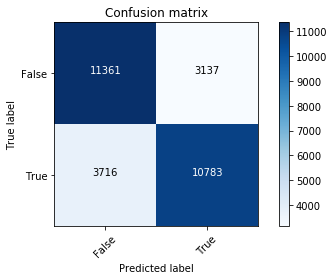

              precision    recall  f1-score   support

       False       0.75      0.78      0.77     14498
        True       0.77      0.74      0.76     14499

   micro avg       0.76      0.76      0.76     28997
   macro avg       0.76      0.76      0.76     28997
weighted avg       0.76      0.76      0.76     28997



In [61]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_mnb)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_mnb,
                      title='Confusion matrix')

### Gridsearch: Multinomial Naive Bayes

In [81]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
              'clf-mnb__alpha': (0, 1e-1, 1e-2),
    }

In [82]:
text_clf_mnb.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-mnb', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-mnb__alpha', 'clf-mnb__class_prior', 'clf-mnb__fit_prior'])

In [83]:
## Cross-validation and fit
gs_clf = GridSearchCV(text_clf_mnb, parameters, cv=5)
gs_clf = gs_clf.fit(X_train,Y_train)
predicted_gs = gs_clf.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Gabri\Anaconda3\lib\s

In [5]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

In [6]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Support Vector Machine classifier:

In [62]:
#### Support Vector Machine
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SVC(C=1.0, kernel='linear')), 
                    ])

In [ ]:
text_clf_svm = text_clf_svm.fit(X_train,Y_train)

In [ ]:
predicted_svm = text_clf_svm.predict(X_test)
accuracy = np.mean(predicted_svm == Y_test)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, predicted_svm)
print(cm)

In [7]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_mnb)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_svm,
                      title='Confusion matrix')

### Gridsearch: Support Vector Machine

In [101]:
#### Gridsearch
## To save time, do sigmoid with degree separately from other kernels
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf-svm__C': (10, 1, 1e-1),
    }

In [102]:
text_clf_svm.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-svm', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-svm__C', 'clf-svm__cache_size', 'clf-svm__class_weight', 'clf-svm__coef0', 'clf-svm__decision_function_shape', 'clf-svm__degree', 'clf-svm__gamma', 'clf-svm__kernel', 'clf-svm__max_iter', 'clf-svm__probability', 'clf-svm__random_state', 'clf-svm__shrinking', 'clf-svm__tol', 'clf-svm__verbose'])

In [103]:
## Cross-validation and fit
gs_clf = GridSearchCV(text_clf_svm, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(X_train,Y_train)
predicted_gs = gs_clf.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

In [8]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

In [9]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Stochastic Gradient Decent (SVM) classifier:

In [7]:
#### Stochastic Gradient Descent (SVM hinge loss) !!! STEMMING REDUCES 2% !!!
text_clf_sgd = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-sgd', SGDClassifier(loss='hinge', # modified_huber
                                                  penalty='l2',
                                                  max_iter=5,
                                                  random_state=42)), 
                    ])

In [8]:
_ = text_clf_sgd.fit(X_train,Y_train)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [9]:
predicted_sgd = text_clf_sgd.predict(X_test)
accuracy = np.mean(predicted_sgd == Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7817705279856537


Confusion Matrix:
[[11070  3428]
 [ 2900 11599]]


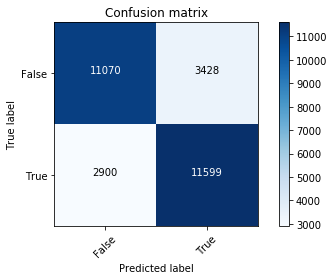

              precision    recall  f1-score   support

       False       0.79      0.76      0.78     14498
        True       0.77      0.80      0.79     14499

   micro avg       0.78      0.78      0.78     28997
   macro avg       0.78      0.78      0.78     28997
weighted avg       0.78      0.78      0.78     28997



In [10]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_sgd)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_sgd,
                      title='Confusion matrix')

### Gridsearch: Stochastic Gradient Descent

In [112]:
#### Gridsearch
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
              'clf-sgd__alpha': (1e-2, 1e-3, 1e-4),
              'clf-sgd__l1_ratio': (0, 0.15, 1)
              #'clf-sgd__learning_rate': (1, 1e-1, 1e-2, 1e-3, 1e-4),
    }

In [113]:
text_clf_sgd.get_params().keys()

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf-sgd', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf-sgd__alpha', 'clf-sgd__average', 'clf-sgd__class_weight', 'clf-sgd__early_stopping', 'clf-sgd__epsilon', 'clf-sgd__eta0', 'clf-sgd__fit_intercept', 'clf-sgd__l1_ratio', 'clf-sgd__learning_rate', 'clf-sgd__loss', 'clf-sgd__max_iter', 'clf-sgd__n_iter', 'clf-sgd__n_iter_no_change', 'clf-sgd__n_jobs', 'clf-sgd__penalty', 'clf-sgd__power_t', 'clf-sgd__random_state', 'clf-sgd__shuffle', 'clf-sgd__tol', 'clf-sgd__validation_fraction', 'clf-sgd__verbose', 'clf-sgd__warm_start'])

In [114]:
## Cross-validation and fit
gs_clf = GridSearchCV(text_clf_sgd, parameters, cv=5)
gs_clf = gs_clf.fit(X_train,Y_train)
predicted_gs = gs_clf.predict(X_test)
accuracy = np.mean(predicted_gs == Y_test)

C:\Users\Gabri\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [10]:
print("Grid search best score:", gs_clf.best_score_)
print(gs_clf.best_params_)
print("Accuracy:", accuracy)

In [11]:
## Graphical visualization
cnf_matrix = confusion_matrix(Y_test, predicted_gs)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = Y_test, predictions = predicted_gs,
                      title='Confusion matrix')

## Neural Network Setup

#### Create a numeric version of this text data set if not present (uncomment below if to do so). Also determines length of vocabulary to use for embedding layer size:

In [11]:
# Create the word mappings
def bagofwords():
    num_data = len(df)
    a = []
    loop = 0
    for loop in range(num_data):
        if (loop % 50000 == 0): # For larger datasets
            print("Update:", loop) # Check spot in dictionary creator
        comment = df[data_col][loop]
        sentTok = nltk.sent_tokenize(comment)
        for sentence in sentTok:
            a.append(sentence)    
    a = (' '.join(a)).lower()
    text = nltk.word_tokenize(a)
    newset = set()
    for word in text:
        newset.add(word)
    # Fill in found words
    word_to_ix = { w:(i+4) for i,w in enumerate(sorted(newset)) }
    ix_to_word = { (i+4):w for i,w in enumerate(sorted(newset)) }
    # Fill in reserved values
    ix_to_word[0] = "<PAD>"
    ix_to_word[1] = "<START>"
    ix_to_word[2] = "<UNK>"
    ix_to_word[3] = "<UNUSED>"
    word_to_ix["<PAD>"] = 0 # Used to equalize text length
    word_to_ix["<START>"] = 1
    word_to_ix["<UNK>"] = 2  # unknown value
    word_to_ix["<UNUSED>"] = 3
    return word_to_ix, ix_to_word

In [12]:
word_to_ix, ix_to_word = bagofwords()
# print(ix_to_word[3853])
# print(word_to_ix["please"]) # Ensure word is in dictionary
print("Size of vocabulary:", len(ix_to_word))

Update: 0
Update: 50000
Update: 100000
Update: 150000
Update: 200000
Update: 250000
Size of vocabulary: 102426


##### An update text will be printed in order to keep track of the conversion process.

In [13]:
## Convert original data to number representations
if (re_read == 1):
    num_data = len(df)
    loop = 0
    converted_text_data = []
    print("Total to print:", num_data)
    for loop in range(num_data):
        if (loop % 50000 == 0): # For larger datasets
            print("Update:", loop) # Check spot in converter
        comment = df[data_col][loop]
        if isinstance(comment, str) == False: # Skip missing text from dataset if present
            continue
        comment = comment.lower()
        text = nltk.word_tokenize(comment)
        length = len(text)
        i = 0
        for i in range(length):
            try:
                text[i] = word_to_ix[text[i]]
            except KeyError:
                text[i] = 2 # Unknown mapping
        text = [int(i) for i in text]
        converted_text_data.append(text)

Total to print: 289967
Update: 0
Update: 50000
Update: 100000
Update: 150000
Update: 200000
Update: 250000


In [14]:
if (re_read == 1):
    with open(file_out, 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow([data_col, label_col])
        i = 0
        for i in range(num_data):
            if (i % 50000 == 0): # For larger datasets
                print("Update:", i) # Check spot in converter
            rev = converted_text_data[i]
            label = df[label_col][i]
            ### Below tow lines are optional
#             if (label != 1):
#                 label = 0
            writer.writerow([rev, label])

Update: 0
Update: 50000
Update: 100000
Update: 150000
Update: 200000
Update: 250000


In [15]:
if (re_read == 1):
    print(len(df))
    print(len(converted_text_data))

289967
289967


#### Read in the converted text to number dataset, shuffle data, and run the classifier:

In [16]:
df = pd.read_csv(file_out, engine = 'python');
print(file_out)
print(df.dtypes)
np.random.seed(42) # Keep permutation assortment the same
df = df.iloc[np.random.permutation(len(df))]
df = df.reset_index(drop=True)
print("Sample size:", len(df))

twitter_sentiment_balanced_final_converted.csv
Tweet        object
Sentiment     int64
dtype: object
Sample size: 289967


In [17]:
## Parses the integer list data from file into a proper integer list for the classifier
full_data = []
for dat in df[data_col]:
    paragraph = []
    sentence = []
    for letter in dat:
        if (letter == '[' or letter == ']' or letter == ' '):
            continue
        elif (letter == ','):
            sentence = (''.join(sentence))
            paragraph.append(sentence)
            sentence = []
        else:
            sentence.append(letter)
    paragraph = [int(i) for i in paragraph]
    full_data.append(paragraph)
print("Dataset length:", len(full_data))

Dataset length: 289967


In [18]:
## Initialize train and test data, train and test labels
num_data = len(df)
num_train = int(num_data * 0.9) # df.head this amount
num_test = int(num_data - num_train) # df.tail this amount
train_data = full_data[:num_train]
test_data = full_data[num_train:]
train_labels = df[label_col].head(num_train) # is_prompt_exists
test_labels = df[label_col].tail(num_test)
print("Number train data:", len(train_data))
print("Number test data:", len(test_data))

Number train data: 260970
Number test data: 28997


In [19]:
## Find the maximum sentence length to use for padding training data
maxlength = 0
data_lengths = []
for i in range(len(full_data)):
    data_lengths.append(len(full_data[i]))
    maxlength = max(len(full_data[i]), maxlength)
#     if maxlength > 4000:
#         print(i)
print("Max text length:", maxlength)
print("Average text length:", np.average(data_lengths))
print("Median text length:", np.median(data_lengths))

Max text length: 45
Average text length: 12.446154217548893
Median text length: 11.0


In [23]:
numabove = 0
for i in range(len(data_lengths)):
    if (data_lengths[i] > 35):
        numabove = numabove + 1
print(len(data_lengths))
print(numabove)
maxlengths = 35 # Create a function later to determine based on proportion
# maxlength = 201

289967
12


In [24]:
## Pad the words to standardized text array length
maxlength = 35 ######## CHANGED ##########
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_to_ix["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlength)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_to_ix["<PAD>"],
                                                      padding='post',
                                                      maxlen=maxlength)

In [25]:
## Initiate validation sets
val_size = int(num_train * 0.9) # Set apart 10% of train data for validation

x_val = train_data[:num_train-val_size]
partial_x_train = train_data[num_train-val_size:]

y_val = train_labels[:num_train-val_size]
partial_y_train = train_labels[num_train-val_size:]

print("Training data length:", len(partial_x_train))
print("Validation data length:",len(x_val))

Training data length: 234873
Validation data length: 26097


### Convolutional Neural Network

In [38]:
## Create the model
import operator # Finding vocabulary length, max dictionary index + 1
vocab_size = max(ix_to_word.items(), key=operator.itemgetter(1))[0] + 1
print("Vocabulary size:", vocab_size)

# def create_model(optimizer='adam'):
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 50))
model.add(keras.layers.Conv1D(50,5,padding='valid',activation='relu',strides=1))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

## Configured model with optimizer and loss function
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Vocabulary size: 102426
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 50)          5121300   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 50)          12550     
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)             

In [39]:
## Train the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=2,
                   batch_size=500,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 234873 samples, validate on 26097 samples
Epoch 1/2
234873/234873 [==============================] - 26s 110us/step - loss: 0.5398 - acc: 0.7241 - val_loss: 0.4851 - val_acc: 0.7712
Epoch 2/2
234873/234873 [==============================] - 25s 107us/step - loss: 0.4516 - acc: 0.7915 - val_loss: 0.4778 - val_acc: 0.7723


In [40]:
## Evaluate the model
predicted_nn = model.predict_classes(test_data)
results = model.evaluate(test_data, test_labels)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

28997/28997 [==============================] - 1s 34us/step
Test loss: 0.4803172052718526
Test accuracy: 0.7702176087201988


Confusion Matrix:
[[11847  2716]
 [ 3947 10487]]


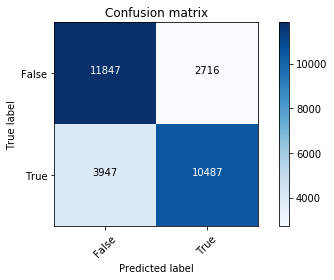

              precision    recall  f1-score   support

       False       0.75      0.81      0.78     14563
        True       0.79      0.73      0.76     14434

   micro avg       0.77      0.77      0.77     28997
   macro avg       0.77      0.77      0.77     28997
weighted avg       0.77      0.77      0.77     28997



In [41]:
## Graphical visualization
cnf_matrix = confusion_matrix(test_labels, predicted_nn)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = test_labels, predictions = predicted_nn,
                      title='Confusion matrix')

In [34]:
## Graph the data
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

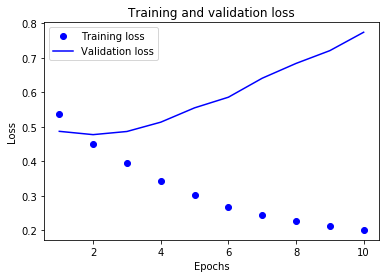

In [36]:
## Visualize training and validation loss
mse = history.history['acc']
val_mse = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mse) + 1)

plt.clf()   # clear figure
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

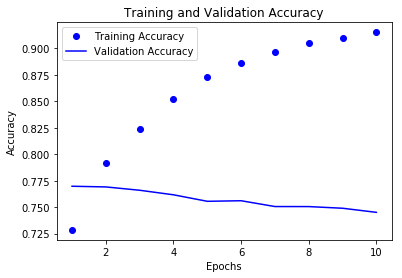

In [37]:
## Visualize training and validation accuracy
plt.clf()   # clear figure
mse = history.history['acc']
val_mse = history.history['val_acc']

plt.plot(epochs, mse, 'bo', label='Training Accuracy')
plt.plot(epochs, val_mse, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Bidirectional Long Short Term Memory

In [50]:
## Create the model
import operator # Finding vocabulary length, max dictionary index + 1
vocab_size = max(ix_to_word.items(), key=operator.itemgetter(1))[0] + 1
print("Vocabulary size:", vocab_size)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 30))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=(15),recurrent_dropout=0.3)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

## Configured model with optimizer and loss function
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Vocabulary size: 102426
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 30)          3072780   
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 30)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 30)                5520      
_________________________________________________________________
dropout_13 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 3,078,331
Trainable params: 3,078,331
Non-trainable params: 0
_________________________________________________________________


In [51]:
## Train the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=2,
                   batch_size=500,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 234873 samples, validate on 26097 samples
Epoch 1/2
234873/234873 [==============================] - 51s 218us/step - loss: 0.5587 - acc: 0.7211 - val_loss: 0.4985 - val_acc: 0.7639
Epoch 2/2
234873/234873 [==============================] - 49s 208us/step - loss: 0.4778 - acc: 0.7813 - val_loss: 0.4850 - val_acc: 0.7709


In [52]:
## Evaluate the model
predicted_nn = model.predict_classes(test_data)
results = model.evaluate(test_data, test_labels)
print("Test loss:", results[0])
print("Test Accuracy:", results[1])

28997/28997 [==============================] - 16s 540us/step
Test loss: 0.48863411981796284
Test Accuracy: 0.7645963375542161


Confusion Matrix:
[[11411  3152]
 [ 3674 10760]]


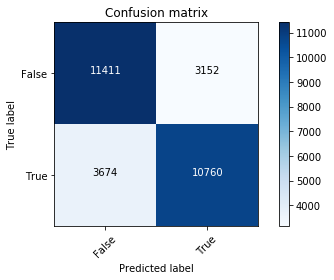

              precision    recall  f1-score   support

       False       0.76      0.78      0.77     14563
        True       0.77      0.75      0.76     14434

   micro avg       0.76      0.76      0.76     28997
   macro avg       0.76      0.76      0.76     28997
weighted avg       0.76      0.76      0.76     28997



In [53]:
## Graphical visualization
cnf_matrix = confusion_matrix(test_labels, predicted_nn)
plt.figure()
class_names = ['False', 'True']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      Y_test = test_labels, predictions = predicted_nn,
                      title='Confusion matrix')

In [46]:
## Graph the data
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

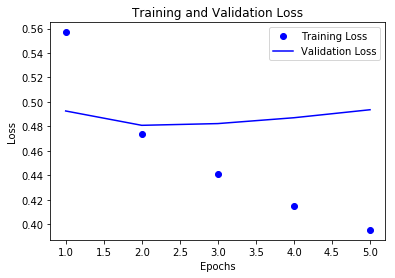

In [48]:
## Visualize training and validation loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()   # clear figure
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

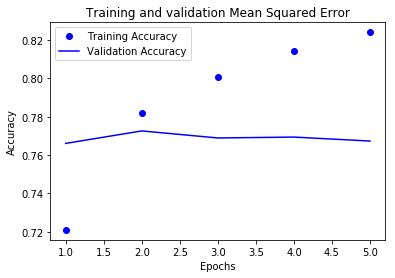

In [49]:
## Visualize training and validation accuracy
plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()